In [1]:
from __future__ import division

import json
from glob import glob
from tqdm import tqdm
import sys, os
import pandas as pd
import scanpy as sc
import scvelo as scv
import hotspot
import numpy as np
import scipy
from scipy import stats
import itertools
import warnings
from collections import OrderedDict 
from scipy.stats import zscore
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.pairwise import cosine_similarity as cosine_similarity_sklearn
import anndata
#plotting
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)

Global seed set to 0
/gstore/home/melocars/.conda/envs/mambapy38/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/gstore/home/melocars/.conda/envs/mambapy38/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
sys.path.append("utils/")
import utils as utils

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Plotting style
sc.settings.set_figure_params(dpi=120, fontsize=10, dpi_save=300, frameon=False, format='pdf')
sc.settings.verbosity = 0
sns.set_style(style="white")
sns.set_style("ticks")

# Load data

In [5]:
adata = sc.read_h5ad(f"data/bleo_plus_IP.h5ad")

# Extended Figure 7b

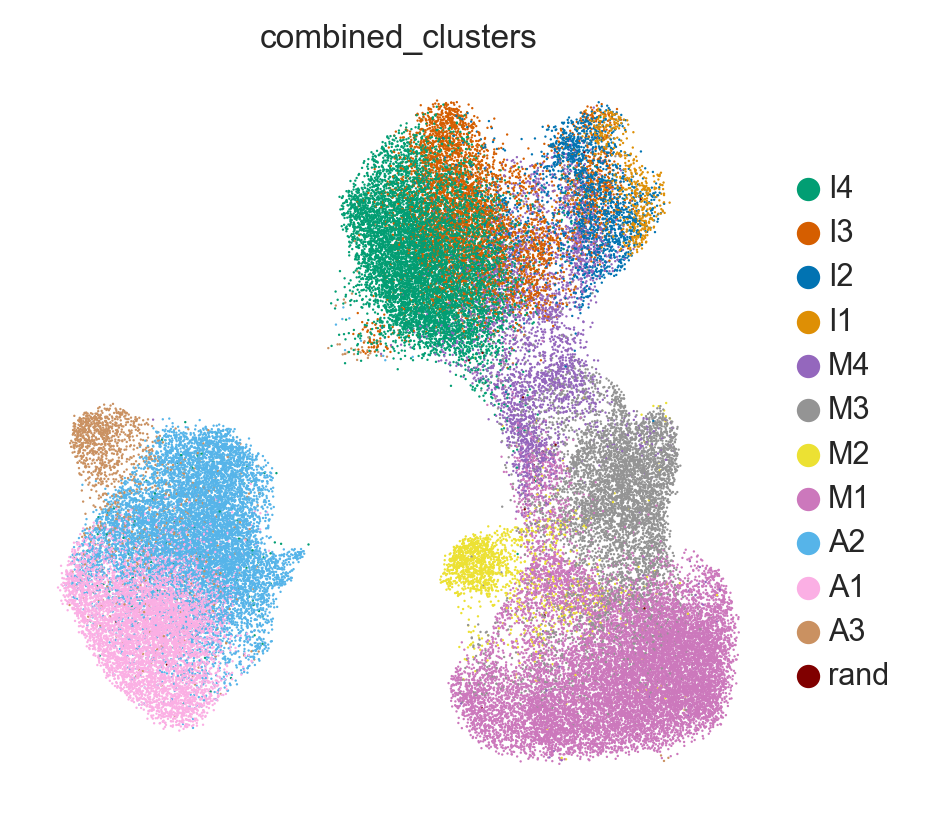

In [6]:
with plt.rc_context({ "font.size" : 12}):
    sc.pl.umap(adata, color='combined_clusters')

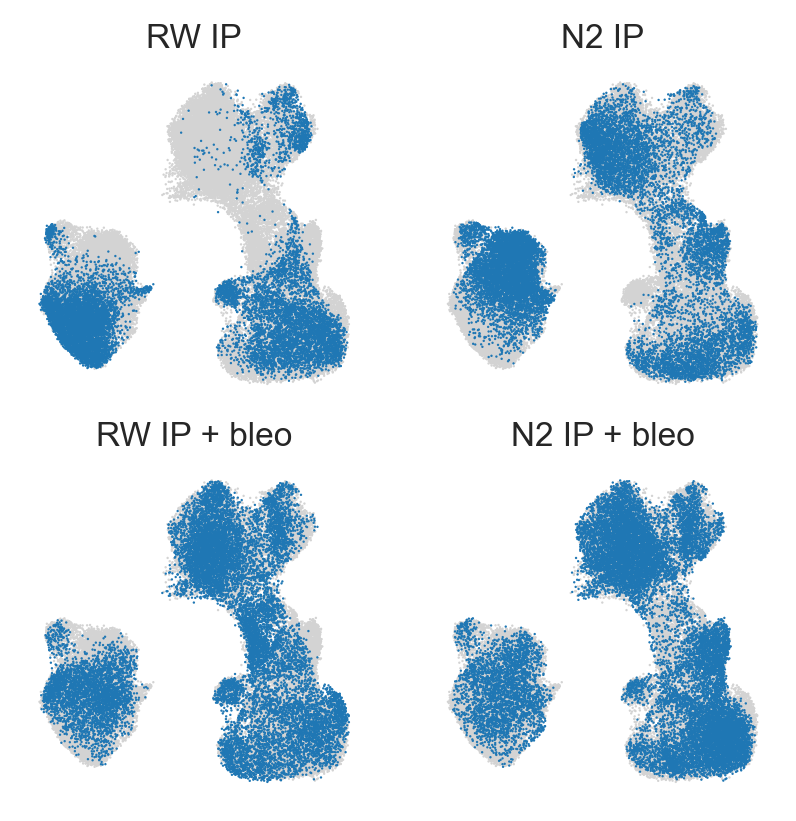

In [7]:
anns = ['RW', 'N2', 'bleo,RW', 'bleo,N2' ]
ts = ['RW IP', 'N2 IP', 'RW IP + bleo', 'N2 IP + bleo' ]

with plt.rc_context({"font.size" : 12}):
    f, ((ax3, ax4), (ax5, ax6)) = plt.subplots(2, 2, figsize=(4, 4))
    
    utils.highlight(adata[adata.obs['combined_clusters']!='rand'], 
             'comparison_col', anns[0], ts[0], ax=ax3)

    utils.highlight(adata[adata.obs['combined_clusters']!='rand'], 
             'comparison_col', anns[1], ts[1], ax=ax4)
    
    utils.highlight(adata[adata.obs['combined_clusters']!='rand'], 
             'comparison_col', anns[2], ts[2], ax=ax5)

    utils.highlight(adata[adata.obs['combined_clusters']!='rand'], 
             'comparison_col', anns[3], ts[3], ax=ax6)

# Figure 7f

In [8]:
ims = adata[adata.obs['Cell_type']=='IM']
ims = ims[ims.obs['combined_clusters'].isin(['I1', 'I2', 'I3', 'I4'])]
ims = ims[~ims.obs['practical_annotation'].isin(['saline,N2', 'saline,RW'])]
ims.X = ims.layers['counts']

In [9]:
ims = utils.proc(ims, key='study', n_pcs=30, n_top_genes='auto')

Putting back counts layers as X
normalizing
selecting highly variable genes
Done selecting 1460 highly variable genes
computing PCA
batch correcting


2024-09-11 11:16:47,082 - harmonypy - INFO - Iteration 1 of 50
2024-09-11 11:16:51,911 - harmonypy - INFO - Iteration 2 of 50
2024-09-11 11:16:56,873 - harmonypy - INFO - Iteration 3 of 50
2024-09-11 11:17:02,001 - harmonypy - INFO - Iteration 4 of 50
2024-09-11 11:17:07,099 - harmonypy - INFO - Iteration 5 of 50
2024-09-11 11:17:10,523 - harmonypy - INFO - Iteration 6 of 50
2024-09-11 11:17:12,958 - harmonypy - INFO - Iteration 7 of 50
2024-09-11 11:17:15,517 - harmonypy - INFO - Iteration 8 of 50
2024-09-11 11:17:17,713 - harmonypy - INFO - Iteration 9 of 50
2024-09-11 11:17:19,963 - harmonypy - INFO - Iteration 10 of 50
2024-09-11 11:17:22,094 - harmonypy - INFO - Iteration 11 of 50
2024-09-11 11:17:24,015 - harmonypy - INFO - Iteration 12 of 50
2024-09-11 11:17:25,474 - harmonypy - INFO - Iteration 13 of 50
2024-09-11 11:17:26,923 - harmonypy - INFO - Iteration 14 of 50
2024-09-11 11:17:28,350 - harmonypy - INFO - Iteration 15 of 50
2024-09-11 11:17:29,846 - harmonypy - INFO - Iter

computing UMAP


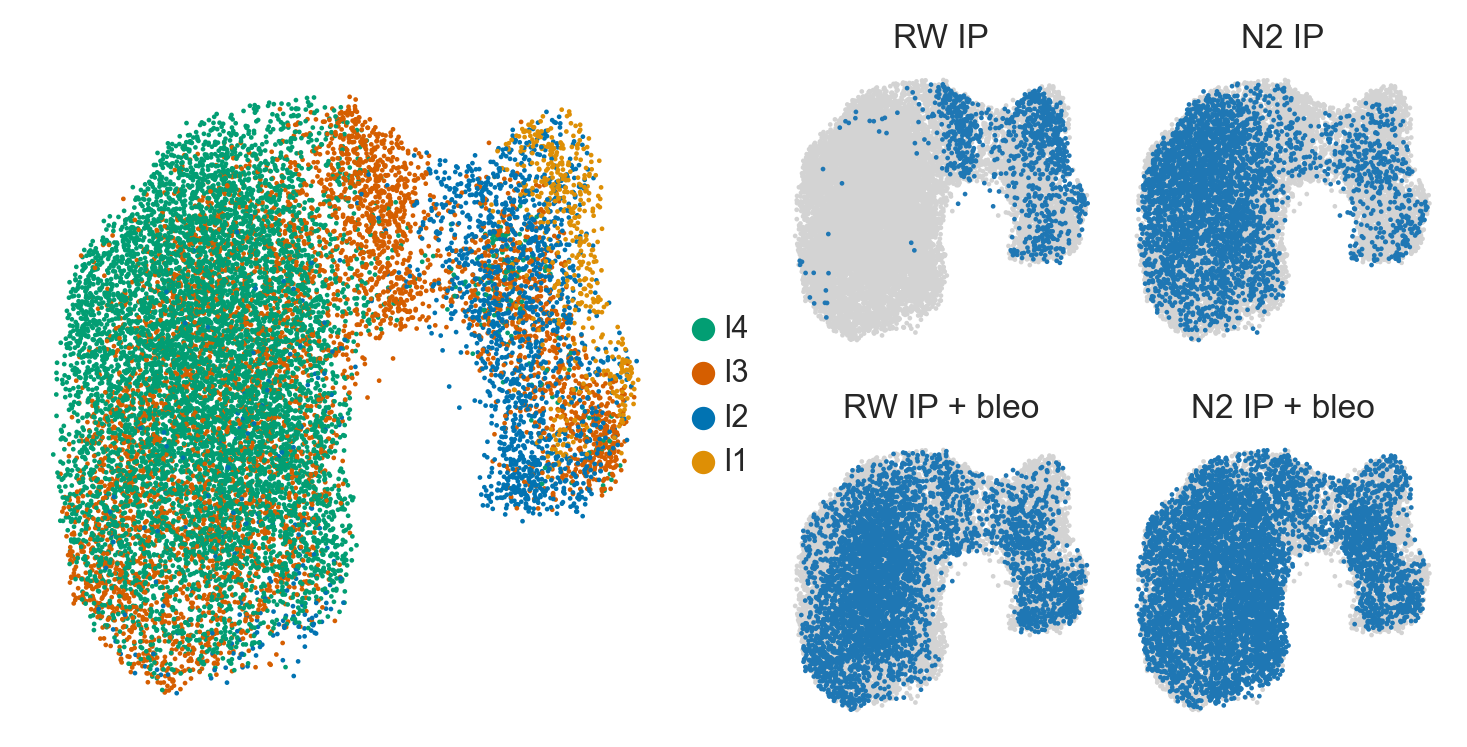

In [10]:
with plt.rc_context({"figure.figsize": (5, 4)}):
    fig3 = plt.figure(constrained_layout=True, figsize=(6, 3))
    gs = fig3.add_gridspec(2, 4)
    f3_ax1 = fig3.add_subplot(gs[0:, :-2])
    sc.pl.umap(ims, color='combined_clusters', title='', show=False, ax=f3_ax1)
    f3_ax2 = fig3.add_subplot(gs[0, 2])
    utils.highlight(ims[ims.obs['combined_clusters']!='rand'], 
             'comparison_col', anns[0], ts[0], ax=f3_ax2)
    f3_ax3 = fig3.add_subplot(gs[0, 3])
    utils.highlight(ims[ims.obs['combined_clusters']!='rand'], 
             'comparison_col', anns[1], ts[1], ax=f3_ax3)
    f3_ax4 = fig3.add_subplot(gs[1, 2])
    utils.highlight(ims[ims.obs['combined_clusters']!='rand'], 
             'comparison_col', anns[2], ts[2], ax=f3_ax4)
    f3_ax5 = fig3.add_subplot(gs[1, 3])
    utils.highlight(ims[ims.obs['combined_clusters']!='rand'], 
             'comparison_col', anns[3], ts[3], ax=f3_ax5)